<a href="https://colab.research.google.com/github/Dalton7718/Dalton_ML-projects/blob/main/FRAUD_DETECTION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split
from sklearn.pipeline import make_pipeline

In [2]:
#create a wrangle function
def wrangle(filename):
  #get the data
  df = pd.read_csv(filename)

  #drop null values
  df.dropna(inplace=True)

  #return the dataframe
  return df

In [3]:
#read the data using the wrangle function
df = wrangle("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
#inspect data
df["Class"].value_counts(normalize=True)

0.0    0.996069
1.0    0.003931
Name: Class, dtype: float64

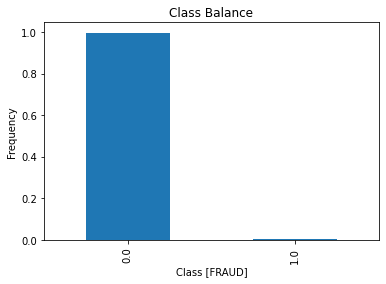

In [5]:
#plot the class imbalance
df["Class"].value_counts(normalize=True).plot(
    kind = "bar",
    xlabel = "Class [FRAUD]",
    ylabel = "Frequency",
    title = "Class Balance"
);

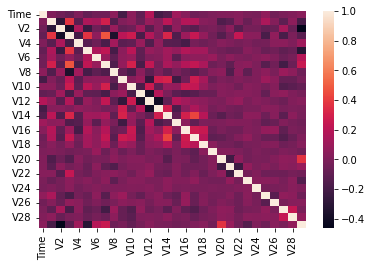

In [6]:
#plot a correlation HeatHamp
corr = df.drop(columns=["Class"]).corr()
sns.heatmap(corr);

In [7]:
#split the dataset
target = "Class"
X = df.drop(columns='Class')
y = df[target]

In [8]:
#train test split
X_train, X_test ,y_train,y_test = train_test_split(
    X,y,
    random_state = 42,
    test_size = 0.2
)

In [9]:
#resample the data
over_sampler = RandomOverSampler(random_state=42)
X_train_over,y_train_over = over_sampler.fit_resample(X_train,y_train)
print("X_train_over shape:",X_train_over.shape)
X_train_over.head()


X_train_over shape: (34858, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,6781,0.946724,-0.811320,0.265932,-0.817474,-0.980097,-0.981556,0.001164,-0.364284,2.911724,...,0.268986,-0.122531,-0.137021,-0.276956,0.424674,0.619433,-0.002015,-0.038106,0.037535,187.14
1,25085,-1.296036,1.665266,0.489306,0.933361,0.200959,1.331414,-1.241339,-1.972315,0.308660,...,0.705539,-1.453384,0.055086,-0.058660,-1.494958,-0.173449,-0.341796,0.265551,0.100623,36.00
2,22289,0.891615,-0.069797,1.160988,2.769679,-0.201457,1.203824,-0.525233,0.202855,1.332341,...,0.098322,-0.177143,-0.333928,-0.140844,-0.813638,0.287887,-0.016154,0.011243,0.041603,131.41
3,19989,-0.268587,0.178222,2.166151,-1.553824,-0.781051,0.130112,-0.623736,-0.581193,2.482561,...,-0.346552,0.646383,-0.247678,-0.274240,0.167861,1.410273,-0.694054,0.116116,0.133894,11.85
4,29563,1.112361,-0.225516,1.114639,0.684915,-1.264641,-0.857559,-0.488535,0.000680,0.636014,...,-0.069332,0.031538,-0.045700,0.077252,0.720451,0.054902,0.370103,-0.021652,0.035162,49.90


In [10]:
#create a baseline for our model
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:",round(acc_baseline,4))

Baseline Accuracy: 0.9959


In [11]:
#iterate
clf = make_pipeline(SimpleImputer(),
                    RandomForestClassifier(random_state=42))

In [12]:
#create a K fold validation
cv_acc_scores = cross_val_score (clf,X_train_over,y_train_over,cv=5,
                                 n_jobs = -1)
#print the scores
print(cv_acc_scores)

[1.         0.99971314 0.99985657 0.99985655 1.        ]


In [13]:
#perform a grid search
params = {
    "randomforestclassifier__n_estimators":range(25,100,25),
    "randomforestclassifier__max_depth": range(10,50,10)
}
params


{'randomforestclassifier__max_depth': range(10, 50, 10),
 'randomforestclassifier__n_estimators': range(25, 100, 25)}

In [14]:
#perform a grid search
model = GridSearchCV(
    clf,
    param_grid = params,
    cv=5,
    n_jobs = -1,
    verbose = 1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [15]:
#fit the model
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [18]:
#get the results
model.cv_results_

{'mean_fit_time': array([1.32440133, 2.66388502, 3.93165941, 1.39070473, 2.686128  ,
        4.07835932, 1.36903763, 2.67313848, 3.99552293, 1.34680419,
        2.90050168, 3.89176278]),
 'mean_score_time': array([0.02776394, 0.04591193, 0.06491337, 0.03043199, 0.04642982,
        0.0665132 , 0.02886763, 0.04668088, 0.07268405, 0.02795563,
        0.07478237, 0.06726561]),
 'mean_test_score': array([0.99988526, 0.99985657, 0.99988525, 0.99988526, 0.99988525,
        0.99988525, 0.99988526, 0.99988525, 0.99988525, 0.99988526,
        0.99988525, 0.99988525]),
 'param_randomforestclassifier__max_depth': masked_array(data=[10, 10, 10, 20, 20, 20, 30, 30, 30, 40, 40, 40],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_randomforestclassifier__n_estimators': masked_array(data=[25, 50, 75, 25, 50, 75, 25, 50, 75, 25, 50, 75],
              mask=[False, Fals

In [19]:
#convert the results into a dataframe
cv_results = pd.DataFrame(model.cv_results_)
#get the first 5 elemnts of the results
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.324401,0.040473,0.027764,0.002177,10,25,"{'randomforestclassifier__max_depth': 10, 'ran...",0.999857,0.999713,0.999857,1.000000,1.0,0.999885,0.000107,1
1,2.663885,0.044303,0.045912,0.001030,10,50,"{'randomforestclassifier__max_depth': 10, 'ran...",0.999857,0.999713,0.999857,0.999857,1.0,0.999857,0.000091,12
2,3.931659,0.117305,0.064913,0.003529,10,75,"{'randomforestclassifier__max_depth': 10, 'ran...",1.000000,0.999713,0.999857,0.999857,1.0,0.999885,0.000107,5
3,1.390705,0.046999,0.030432,0.005157,20,25,"{'randomforestclassifier__max_depth': 20, 'ran...",0.999857,0.999713,0.999857,1.000000,1.0,0.999885,0.000107,1
4,2.686128,0.076218,0.046430,0.001956,20,50,"{'randomforestclassifier__max_depth': 20, 'ran...",1.000000,0.999713,0.999857,0.999857,1.0,0.999885,0.000107,5


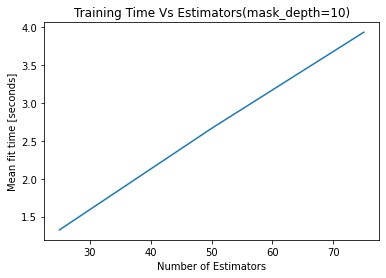

In [22]:
#training time vs N estimators
mask = cv_results["param_randomforestclassifier__max_depth"] == 10
#plot time vs n estimators
plt.plot(
    cv_results[mask]["param_randomforestclassifier__n_estimators"],
    cv_results[mask]["mean_fit_time"]
)
plt.xlabel("Number of Estimators")
plt.ylabel("Mean fit time [seconds]")
plt.title("Training Time Vs Estimators(mask_depth=10)");

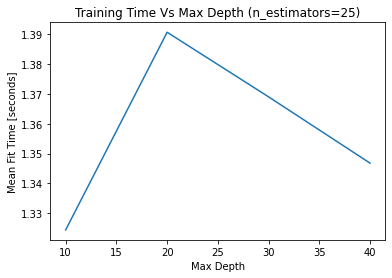

In [25]:
#training time vs Max Depth
#create a mask
mask = cv_results["param_randomforestclassifier__n_estimators"]==25
#plot the graph
plt.plot(
    cv_results[mask]["param_randomforestclassifier__max_depth"],
    cv_results[mask]["mean_fit_time"]
)
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time Vs Max Depth (n_estimators=25)");

In [26]:
#extract the best hyperparemeters
model.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__n_estimators': 25}

In [27]:
#best score
model.best_score_

0.9998852553069421

In [28]:
#return the best model
model.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, n_estimators=25,
                                        random_state=42))])

In [32]:
#get the accuracy score
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)
print("Accuracy Train:",acc_train)
print("Accuracy Test:",acc_test)

Accuracy Train: 0.9999428604079766
Accuracy Test: 0.9986288848263254


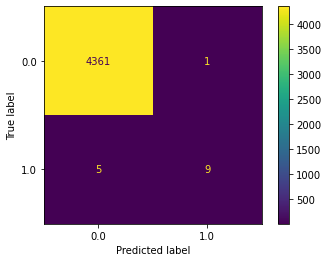

In [35]:
#plot a confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

In [38]:
#communicate the results

#get feature names from training data
features = X_train_over.columns
features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [39]:
#get the importances
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
importances

array([0.00175586, 0.0040484 , 0.03084994, 0.13156101, 0.09867233,
       0.00341311, 0.03889747, 0.00046135, 0.00214841, 0.02498381,
       0.06545922, 0.00440994, 0.04082764, 0.00181746, 0.34775088,
       0.00376991, 0.00735788, 0.12552994, 0.00200485, 0.01420276,
       0.00542347, 0.00219926, 0.00129432, 0.00140969, 0.0016715 ,
       0.00045372, 0.00589336, 0.0247993 , 0.00179418, 0.00513901])

In [41]:
#create a series
feat_imp = pd.Series(importances,index=features).sort_values()
feat_imp.head()

V25    0.000454
V7     0.000461
V22    0.001294
V23    0.001410
V24    0.001672
dtype: float64

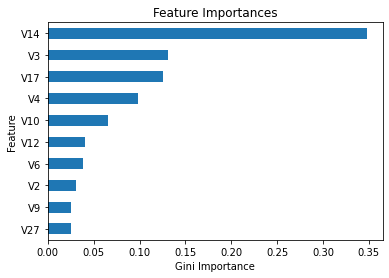

In [44]:
#plot
feat_imp.tail(10).plot(kind = "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importances");